보스톤 주택가격

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
from sklearn.datasets import load_boston
boston = load_boston()

In [17]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 산점도와 선형회귀선

In [18]:
features = df.columns[1:-1]
print(features)

Index(['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


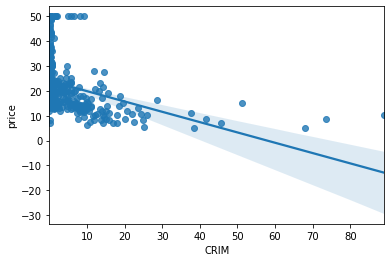

In [19]:
sns.regplot(x='CRIM', y='price', data=df)
plt.show()

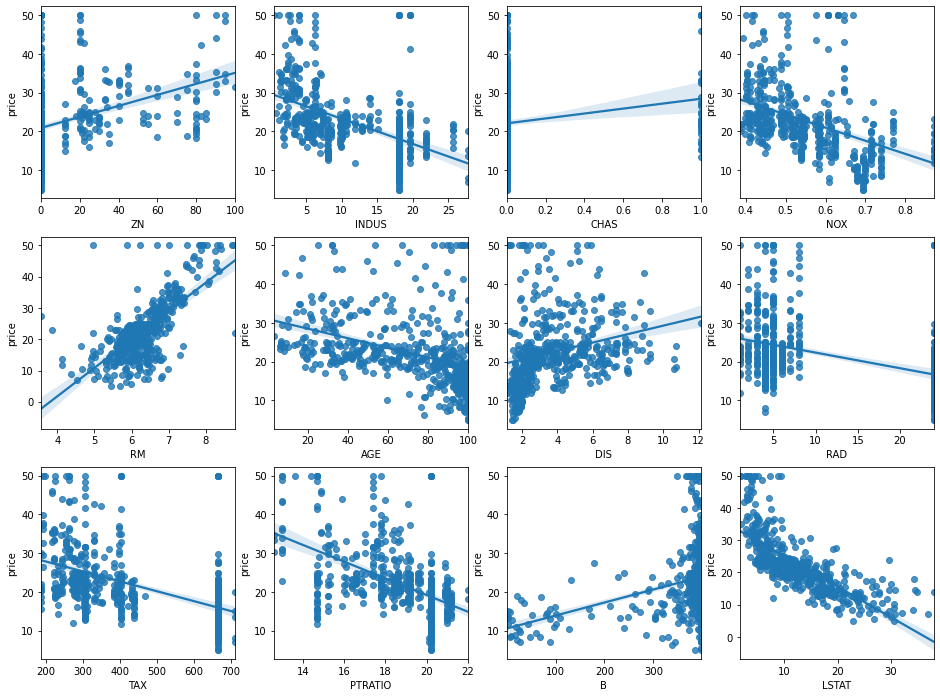

In [28]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,12))
for i, feature in enumerate(features):
    row, col =i//4, i%4
    sns.regplot(x=feature, y='price', data=df, ax=axs[row][col])

- 어떤 feature가 가격과 상관관계가 높을까?

In [25]:
from sklearn.linear_model import LinearRegression


In [26]:
y=boston.target
X=df['CRIM'].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.15078046904975717

In [31]:
y = boston.target
for feature in boston.feature_names: #반복문에서 i는 정수일때, name은 단수형으로 
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X,y)
    r2=lr.score(X,y)
    print(f'{feature}:{r2:.4f}')

CRIM:0.1508
ZN:0.1299
INDUS:0.2340
CHAS:0.0307
NOX:0.1826
RM:0.4835
AGE:0.1421
DIS:0.0625
RAD:0.1456
TAX:0.2195
PTRATIO:0.2578
B:0.1112
LSTAT:0.5441


- 다중 선형회귀

In [32]:
X = boston.data
y = boston.target
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [33]:
# 다중 선형회귀
lr.score(X,y)

0.7406426641094095

In [35]:
# weight
lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [36]:
# bias
lr.intercept_

36.459488385089855

- 회귀식
<pre>
price = -0.108*CRIM +0.046 *ZN + 0.021 * INDUS + 2.69*CHAS -0.178*NOX + 3.81*RM + 0.00069*AGE-1.48*DIS+0.306*RAD-0.012*TAX - 0.953*PTRATIO+0.00931*B + 0.0525*LSTAT + 36.46

- 테스트데이터

In [38]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [40]:
# 기울기와 절편을 이용한 예측값
np.dot(lr.coef_,boston.data[0]) + lr.intercept_

30.003843377016814

In [41]:
# 실제값
boston.target[0]

24.0

In [43]:
# 5개 데이터에 대한 예측값 및 실제값
for i in range(5):
    pred = np.dot(lr.coef_,boston.data[i]) + lr.intercept_
    print(f'예측값:{pred:.2f}, 실제값:{boston.target[i]}')

예측값:30.00, 실제값:24.0
예측값:25.03, 실제값:21.6
예측값:30.57, 실제값:34.7
예측값:28.61, 실제값:33.4
예측값:27.94, 실제값:36.2


In [49]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [44]:
#데이터가 여러개일때
lr.predict(boston.data[:5])

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

In [46]:
#데이터가 한개일때
lr.predict(boston.data[0:1]), lr.predict(boston.data[0].reshape(1,-1))

(array([30.00384338]), array([30.00384338]))

SyntaxError: invalid syntax (<ipython-input-50-d3bfc60e1775>, line 1)